In [53]:
import nltk
from nltk.corpus import stopwords
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud 
from collections import Counter
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
df = pd.read_csv(r'data\non-processed\dataset6\Twitter Sentiments.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
#cleaning tweets
def cleanTweets(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' 
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    
 url = re.compile(r"https?://\S+|www\.\S+") 
 text = url.sub(r"", text) # Removing URls

 stop = set(stopwords.words("english"))
 text = [word.lower() for word in text.split() if word.lower not in stop] # Removing stopwords

 return " ".join(text)

#clean the tweets
df['clean_tweets'] = df['tweet'].apply(cleanTweets)

df

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,5,0,factsguide: society now #motivation,factsguide: society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","sikh temple vandalised in in calgary, wso cond..."


In [4]:
df['tweet'] = df['tweet'].map(cleanTweets)

In [5]:
df.tweet

0        when a father is dysfunctional and is so selfi...
1        thanks for lyft credit i can't use cause they ...
2                                      bihday your majesty
3        model i love u take with u all the time in urð...
4                       factsguide: society now motivation
                               ...                        
31957    ate isz that youuu?ððððððð...
31958    to see nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960    sikh temple vandalised in in calgary, wso cond...
31961                             thank you for you follow
Name: tweet, Length: 31962, dtype: object

In [6]:
#get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

#get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['clean_tweets'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweets'].apply(getPolarity)

df

,id,label,tweet,clean_tweets,Subjectivity,Polarity
0,1,0,when a father is dysfunctional and is so selfi...,when a father is dysfunctional and is so selfi...,1.0,-0.500000
1,2,0,thanks for lyft credit i can't use cause they ...,thanks for lyft credit i can't use cause they ...,0.2,0.200000
2,3,0,bihday your majesty,bihday your majesty,0.0,0.000000
3,4,0,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...,0.6,0.976562
4,5,0,factsguide: society now motivation,factsguide: society now motivation,0.0,0.000000
...,...,...,...,...,...,...
31957,31958,0,ate isz that youuu?ððððððð...,ate isz that youuu?ððððððð...,0.0,0.000000
31958,31959,0,to see nina turner on the airwaves trying to w...,to see nina turner on the airwaves trying to w...,0.5,0.400000
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,1.0,-0.500000
31960,31961,1,"sikh temple vandalised in in calgary, wso cond...","sikh temple vandalised in in calgary, wso cond...",0.0,0.000000


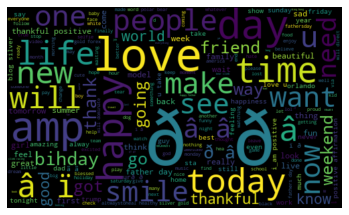

In [7]:
# word visualization
allWords = ' '.join([twts for twts in df['clean_tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
#function for analysing the data 
def getAnalysis(score):
    if score<0 :
        return 'Negative'
    elif score==0 :
        return 'Neutral'
    else:
        return 'Positive'

In [9]:
df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,id,label,tweet,clean_tweets,Subjectivity,Polarity,Analysis
0,1,0,when a father is dysfunctional and is so selfi...,when a father is dysfunctional and is so selfi...,1.0,-0.500000,Negative
1,2,0,thanks for lyft credit i can't use cause they ...,thanks for lyft credit i can't use cause they ...,0.2,0.200000,Positive
2,3,0,bihday your majesty,bihday your majesty,0.0,0.000000,Neutral
3,4,0,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...,0.6,0.976562,Positive
4,5,0,factsguide: society now motivation,factsguide: society now motivation,0.0,0.000000,Neutral
...,...,...,...,...,...,...,...
31957,31958,0,ate isz that youuu?ððððððð...,ate isz that youuu?ððððððð...,0.0,0.000000,Neutral
31958,31959,0,to see nina turner on the airwaves trying to w...,to see nina turner on the airwaves trying to w...,0.5,0.400000,Positive
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,1.0,-0.500000,Negative
31960,31961,1,"sikh temple vandalised in in calgary, wso cond...","sikh temple vandalised in in calgary, wso cond...",0.0,0.000000,Neutral


In [10]:
# let's get negative tweets
print('Negative tweets:\n')
k=1
negativeTweets = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0, negativeTweets.shape[0]):
  if(negativeTweets['Analysis'][i] == 'Negative'):
    print(str(k) + ' '+negativeTweets['clean_tweets'][i])
    print()
    k=k+1

Negative tweets:

1 when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. run

2 the next school year is the year for exams.ð¯ can't think about that ð­ school exams hate imagine actorslife revolutionschool girl

3 â ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may blog silver gold forex

4 we are so selfish. orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love

5 sad little dude.. badday coneofshame cats pissed funny laughs

6 it was a hard monday due to cloudy weather. disabling oxygen production for today. goodnight badmonday

7 it's unbelievable that in the 21st century we'd need something like this. again. neverump xenophobia

8 yup, being a knicks fan is hard, so its easier to just be an nba fan when the playoffs roll around ð

9 whenever im and something goes wrong |

10 you've really hu my feelings :(

11 carrying a gun wouldn't of helped if you can't take it

710 the sad thing after the mass shootings happens it seems like the crime rate goes up afterward. it seems to be true for san bernardino

711 anxiety depression mentalhealth nursing help complicated noenergy whocares alone psychosis unwanted

712 fuck xenophobia and ! drink arabian spiced coffee, and eat berberian spiced food! rainbow diversity onlyâ¦

713 the sad moment when you walk into a bookstore and see what can't take all the books

714 this guy worked for a security company and had 2 gun permits. i think something needs done but not sure of the answer

715 zomg game of thrones! got gameofthrones

716 donât react to anger, respond to it! conflict relationships

717 all i wanted to do for my bihday was watch tonight but i ended up missing the season premier cry

718 you are pointless. your whole life will amount to nothing. you are patently, preturnaturally devoid of all but ego.

719 in other news, my bro brought home 2 big toblerons, a pack of curly tops and 2 mini kitkats.

1362 my boyfriend hasn't come back home yet :( crazyboyfriend crazy fatkid fat nerd gamer

1363 shocked! wow

1364 see you in a few hours* cantwait beatecc

1365 so had enough of how ill as my baby got to be before you intervene ??? frustrated disappointed

1366 it is impossible for you to be and laugh at the same time.

1367 why do people choose to come at you with weak barbs? burn funny

1368 if you lose your dad that is . if you lose your mom too, that's just careless! parents fathersday

1369 cruel world brokes a kind soul ð¢

1370 can't comprehend what they must be feeling. this is lemans! absolutely unbelievable! lemans shithappens

1371 nothing human about cruel bitter sociopathic the soul has fled the fugly lunatic.

1372 false lashes delivered now to wait for my hair extensions then a night on the town is in order! can't wait!

1373 what's nbc sick obsession with manscum ?

1374 kaf16 brochure gone to print! woohoo exhausted

1375 what in the fuck is this? presidentpussygrab

2078 sad how muslims eat during the ramadaan.. noshame

2079 when you fail to buy an apament because you had to pay an unanimous bill pissedoff â¦

2080 little peeker. what monitorlizard

2081 mcds , dq, and little ceasars because mex lost ð«ð¢ depressed

2082 and i'm counting down ðð its 6 days till summer, since i shot this photo yesterday ðð _x_ cantwait

2083 man knows ur dream, an tries to ruin it.

2084 literally at the bar by myself to watch the end of the finals game game7 lebron

2085 i am not ready to leave minneapolis tomorrow. minnesota minneapolis

2086 funnyvideos attack bull game 3d: do you really think that his head was empty around the city. each side i

2087 ð toptags top.tags nothappy cry crying tears instasad ness depressed aloneâ¦

2088 mixing some business and pleasure at the reds game . sad to see a colleague go back home to india â¦

2089 what is wrong with these guys!!?? this is supposed to be an occasion for everyone to enjoy.

2090 tragi


2972 dark, western sciencefiction antagonizing aliens:

2973 this world is so fucking racist (they asked the manager at wells fargo for here social security number just because she sounds mexican)

2974 macedonia celebrates its 26th as it sinks the state deeper into crisis. no moral obligation, no sense of dutâ¦

2975 people who can get time off work to go to the euros and haven't gone need to a have long hard look at their selfs!

2976 my baby came back home today â¤ï¸ðð¼ðð¼ we missed each other like crazy &amp; he was only gone for 3 days ð­ð­ attachedatthehip

2977 when this comes up as breaking news. poor bastard. i knew she was trouble. just shake it off. unfriend wtf

2978 brother ronaldo what wrong with yu? i'm so sad fr yu and others now!

2979 everyday is your day, sparkle always quote sparkle keepshining jewellery jewelmaze

2980 my peach ice cream tastes like cheap ice cream even though it was v expensive disappointed

2981 sad to hear about 2yr old at disn

3848 finally!! wiiiiiiiiiiiiiiiiiii ðâ¤ overwatch blizzard game finally hype tracer

3849 if all your nightmares and fears have been true,how can they be false this time around :( feelingbad depressed trust fling affair

3850 kids being left in cars and left to get close to dangerous animals shows how irresponsible parents are with their kids noâ¦

3851 painful truth-another gunman w hate ideology (racism, trumpism, islam, christian) has easy access to assault weapons

3852 looked small &amp; amateurish; his questions were inappropriate &amp; unjustly harsh

3853 arabs all of them preying on poor slavelabor

3854 negative emotions have an impoant role to play in a life; they're big, flashing signs that something needs toâ¦

3855 the most dangerous thing in democracy is we choose leader with trust and then they form a govt which never follow the democracy at all

3856 missing my friends lonely_withoutthem

3857 le mans pit lane is the place to be for any motorspo junkie. only a fe


4708 it's off to watch the football game between romania &amp; france! ðð goromania

4709 i hate it when i see people rounding up other followers to back up their opinion about a tweet a tweeter. this to me is also bullying

4710 some of the things i've been working on for this week. to see this game come together!

4711 after spending a week in bed sick, i finally get to leave the house. que energyoverload!

4712 just got done watching 13 hrs. man what did we do to our people. shameful we need trump now. our gov. is pathetic.

4713 smoking a black in an eno ðº

4714 see what russia is doing in syria, destroying masjids

4715 we spent familytime by doing simple wefie, we're latepost melawanarus untukâ¦

4716 i will be so angry with arsenal if city sign aubameyang for the money which we could afford arsenal afc ð¤ð¤

4717 how stupid are the russians and english fans killing each other for a 1-1 game ! please grow up euro2016

4718 i feel horrible just watching my brother b

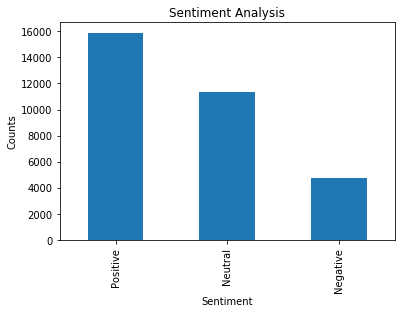

In [11]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [12]:
#Let's check statistics
df['Analysis'].value_counts()

Positive    15881
Neutral     11359
Negative     4722
Name: Analysis, dtype: int64

In [13]:
negTweets = df[df.Analysis == 'Negative']
#negTweets = negTweets['clean_tweets']
#negTweets
negTweets.shape[0] / df.shape[0] * 31962 #accurate number for negative tweets

4722.0

In [14]:
# Creating a mapping in the Counter to count occurances in our corpus
# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [18]:
negTweets.clean_tweets

0        when a father is dysfunctional and is so selfi...
7        the next school year is the year for exams.ð...
10       â ireland consumer price index (mom) climbed...
11       we are so selfish. orlando standwithorlando pu...
21       sad little dude.. badday coneofshame cats piss...
                               ...                        
31917    i feel horrible just watching my brother being...
31918    what the hell is wrong with humanity? why woul...
31923    hea is the easiest thing which can be fooled, ...
31955    less than 2 weeks ð ðð¼ð¹ððµ ibi...
31959    listening to sad songs on a monday morning otw...
Name: clean_tweets, Length: 4722, dtype: object

In [19]:
text = negTweets.clean_tweets

counter = counter_word(text)

In [20]:
len(counter)

15631

In [21]:
counter

Counter({'when': 247,
         'a': 1236,
         'father': 13,
         'is': 881,
         'dysfunctional': 1,
         'and': 951,
         'so': 432,
         'selfish': 5,
         'he': 124,
         'drags': 1,
         'his': 175,
         'kids': 35,
         'into': 45,
         'dysfunction.': 1,
         'run': 18,
         'the': 1853,
         'next': 54,
         'school': 24,
         'year': 31,
         'for': 638,
         'exams.ð\x9f\x98¯': 1,
         "can't": 134,
         'think': 115,
         'about': 183,
         'that': 443,
         'ð\x9f\x98\xad': 11,
         'exams': 5,
         'hate': 191,
         'imagine': 6,
         'actorslife': 1,
         'revolutionschool': 1,
         'girl': 66,
         'â\x86\x9d': 61,
         'ireland': 6,
         'consumer': 4,
         'price': 4,
         'index': 6,
         '(mom)': 4,
         'climbed': 2,
         'from': 182,
         'previous': 35,
         '0.2%': 1,
         'to': 1657,
         '0.5%': 

In [45]:
num_words = len(counter)

#For each sequence we need to have same length when we are doing it with TensorFlow
#mapping them to the same sequence size
max_length = 100

In [48]:
train = negTweets
#Note: another dataset needs to be applied
test = negTweets

train_size = int(train.shape[0] * 0.8)

train_sentences = train.clean_tweets[:train_size]
train_labels = train.id[:train_size]

test_sentences = train.clean_tweets[train_size:]
test_labels = train.id[train_size:]

In [49]:
#Tokenizing train setences
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_sentences)

In [50]:
word_index = tokenizer.word_index

In [51]:
word_index

{'the': 1,
 'to': 2,
 'a': 3,
 'and': 4,
 'i': 5,
 'in': 6,
 'is': 7,
 'of': 8,
 'you': 9,
 'for': 10,
 'my': 11,
 'this': 12,
 'that': 13,
 'so': 14,
 'are': 15,
 'on': 16,
 'be': 17,
 'it': 18,
 'not': 19,
 'amp': 20,
 'with': 21,
 'sad': 22,
 'me': 23,
 'all': 24,
 'just': 25,
 'was': 26,
 'but': 27,
 'at': 28,
 'people': 29,
 "i'm": 30,
 'have': 31,
 'your': 32,
 'when': 33,
 'like': 34,
 'we': 35,
 "it's": 36,
 'no': 37,
 'do': 38,
 'bear': 39,
 'hate': 40,
 'what': 41,
 'they': 42,
 'polar': 43,
 'about': 44,
 'out': 45,
 'game': 46,
 'down': 47,
 'as': 48,
 'how': 49,
 'his': 50,
 'day': 51,
 'now': 52,
 'from': 53,
 'black': 54,
 'by': 55,
 'up': 56,
 'can': 57,
 'will': 58,
 "don't": 59,
 'why': 60,
 'angry': 61,
 'little': 62,
 'an': 63,
 'get': 64,
 'who': 65,
 'orlando': 66,
 'really': 67,
 'bad': 68,
 'â\x80¦': 69,
 'has': 70,
 'climb': 71,
 "can't": 72,
 'racing': 73,
 'life': 74,
 'he': 75,
 '2': 76,
 'one': 77,
 'see': 78,
 'feel': 79,
 'if': 80,
 'time': 81,
 'our': 82

In [52]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
#Let's check the sentence produces by training data
train_sequences[0]

[33, 3, 572, 7, 3980, 4, 7, 14, 823, 75, 3981, 50, 256, 208, 50, 3982, 482]

In [54]:
# pad sequences to specific lenght 
# because of LSTM architecture we need to have same seq. length
train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [55]:
train_padded[0]

array([  33,    3,  572,    7, 3980,    4,    7,   14,  823,   75, 3981,
         50,  256,  208,   50, 3982,  482,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [56]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [59]:
print(train.clean_tweets[0])
print(train_sequences[0])

when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. run
[33, 3, 572, 7, 3980, 4, 7, 14, 823, 75, 3981, 50, 256, 208, 50, 3982, 482]
